<a href="https://colab.research.google.com/github/Turtle-Grace/gracehuangtw/blob/main/0320_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise: Working with DateTime Variables
In this task, you will work with **date and time data** in Pandas. The data set used contains counts of cyclists at various time intervals and locations in Munich. The data set contains the following variables:
- `“datum”` = date
- `“uhrzeit_start”` = start of the measurement interval
- `“uhrzeit_ende”` = end of the measurement interval
- `“richtung_1”` = direction of travel 1 of the cyclist
- `“richtung_2”` = direction of travel 2 of the cyclist
- `gesamt` = total number of cyclists in a time interval

In [1]:
import pandas as pd
from datetime import datetime, date, time, timedelta
import matplotlib.pyplot as plt

df = pd.read_csv('rad_15min_condensed.csv')
df.head()

,datum,uhrzeit_start,uhrzeit_ende,zaehlstelle,richtung_1,richtung_2,gesamt
0,2022.11.01,06:15,06:30,Kreuther,0.0,0.0,0.0
1,2022.11.01,06:15,06:30,Margareten,3.0,1.0,4.0
2,2022.11.01,06:15,06:30,Olympia,0.0,0.0,0.0
3,2022.11.01,06:30,06:45,Arnulf,6.0,0.0,6.0
4,2022.11.01,06:30,06:45,Erhardt,1.0,1.0,2.0


## Task 1
**Creating Time Variables**
- Use the columns **`datum` (date)** and **`uhrzeit_start` (start time)** to create a new column called **`datetime_start`**.
- Similarly, combine **`datum` (date)** and **`uhrzeit_ende` (end time)** into a new **`datetime_end`** column.
- Make sure that the variables is in the correct **datetime format**.
- After successfully creating `datetime_start` and `datetime_end`, **remove the original columns** (`datum`, `uhrzeit_start`, and `uhrzeit_ende`) from the dataset.

In [2]:
datetime_start = df["datum"] + " " + df["uhrzeit_start"]
datetime_end = df["datum"] + " " + df["uhrzeit_ende"]

df["datetime_start"] = pd.to_datetime(datetime_start)
df["datetime_end"] = pd.to_datetime(datetime_end)
df.drop(columns=["datum", "uhrzeit_start", "uhrzeit_ende"], inplace=True)
df.head()


,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00


## Task 2
In this task, you will analyze time-based trends in cycling data: determine **the peak hour for each counting station ("zaehlstelle")** based on the total number of cyclists recorded. Your result should be a dataframe showing:
 - The **counting station (`zaehlstelle`)**  
  - The **peak hour (`peakhour`)**  
  - The **total number of cyclists during that peak hour (`total_cyclists_peakhour`)**  



In [3]:

df["rounded_h"] = df["datetime_start"].dt.hour
#Sum cyclists per station-hour
grouped = (
    df.groupby(["zaehlstelle", "rounded_h"])["gesamt"]
      .sum()
      .reset_index(name="total_cyclists")
)

#Identify the row for each station with the highest total_cyclists
peak_df = (
    grouped.loc[grouped.groupby("zaehlstelle")["total_cyclists"].idxmax()]
    .reset_index(drop=True)
)

#Rename columns
peak_df.rename(columns={
    "rounded_h": "peakhour",
    "total_cyclists": "total_cyclists_peakhour"
}, inplace=True)


peak_df.head()


,zaehlstelle,peakhour,total_cyclists_peakhour
0,Arnulf,8,16585.0
1,Erhardt,8,47874.0
2,Hirsch,8,24266.0
3,Kreuther,7,8532.0
4,Margareten,17,34745.0


## Task 3
Analyze the dataset to determine whether the number of cyclists follows a **trend** or exhibits **seasonal patterns**.

1. **Trend Analysis**
Investigate if the cyclist count follows an increasing or decreasing trend.
- Compute a **7-day moving average** to smooth out short-term fluctuations.
- Plot both the **original data** and the **moving average**.

2. **Apply Differencing to Remove Trends**
- Compute the **first-order difference** of the data.
- Plot the differenced data and analyze whether the trend is removed.

3. **Compute ACF & PACF**
- **Autocorrelation Function (ACF):** Detect repeating cycles (e.g., daily or weekly patterns).
- **Partial Autocorrelation Function (PACF):** Identify significant lags that influence future values.

**Questions for Analysis**
- **Do you observe a clear trend in the cyclist count over time?**  
- **Is there a repeating pattern in the data?**  
- **What do the ACF/PACF plots suggest about seasonal effects?**  


In [4]:
#3-1.
df["avg_7day_moving"] = df["gesamt"].rolling(window=1500).mean()
#transform the time based on the intervals of the data set
df.head()

,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end,rounded_h,avg_7day_moving
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,NaN
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,NaN
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,NaN
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6,NaN
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6,NaN


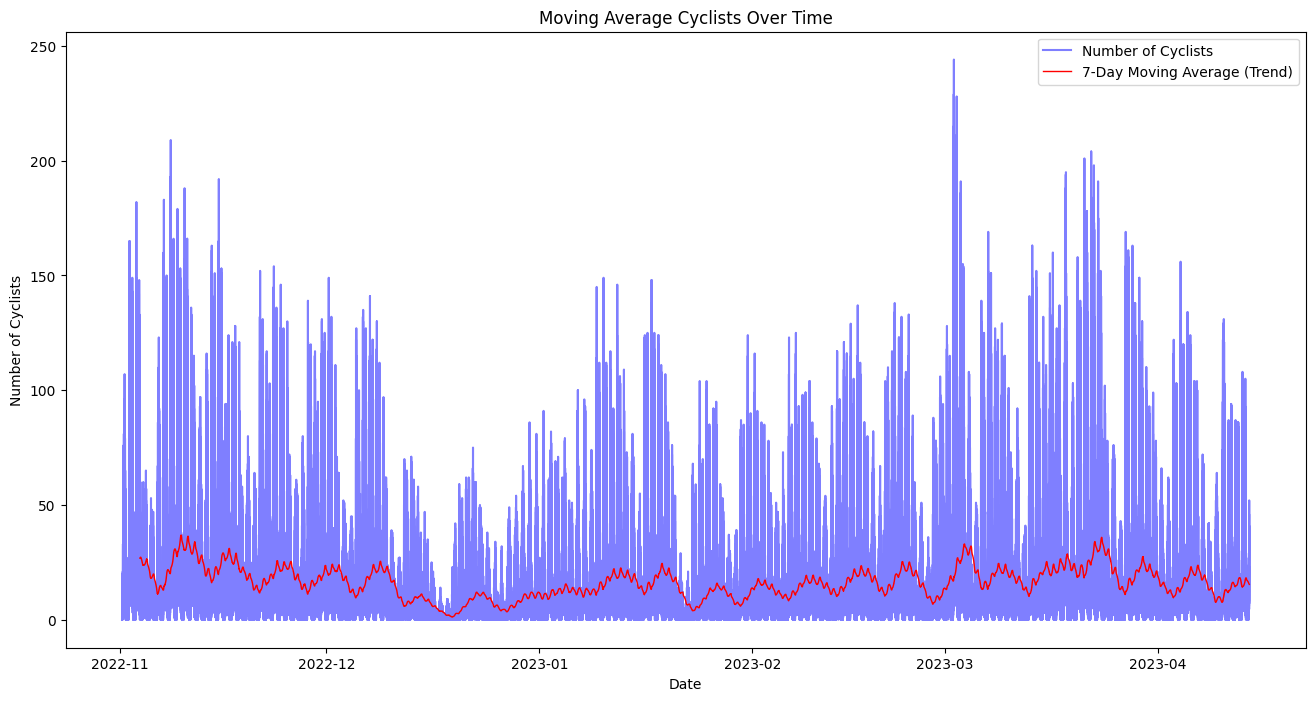

In [5]:

plt.figure(figsize=(16, 8))
plt.plot(df["datetime_start"], df["gesamt"], label="Number of Cyclists", color="blue", alpha=0.5)

plt.plot(df["datetime_start"], df["avg_7day_moving"],
         label="7-Day Moving Average (Trend)",
         color="red", linewidth=1)

plt.xlabel("Date")
plt.ylabel("Number of Cyclists")
plt.title("Moving Average Cyclists Over Time")
plt.legend()
plt.show()




In [6]:
#3-2.
# Differencing is a technique to remove trends and make a time series stationary (i.e., with constant mean and variance).
df["datetime_start"] = pd.to_datetime(df["datetime_start"])
df["difference"] = df["gesamt"].diff()
df.head()


,zaehlstelle,richtung_1,richtung_2,gesamt,datetime_start,datetime_end,rounded_h,avg_7day_moving,difference
0,Kreuther,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,NaN,NaN
1,Margareten,3.0,1.0,4.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,NaN,4.0
2,Olympia,0.0,0.0,0.0,2022-11-01 06:15:00,2022-11-01 06:30:00,6,NaN,-4.0
3,Arnulf,6.0,0.0,6.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6,NaN,6.0
4,Erhardt,1.0,1.0,2.0,2022-11-01 06:30:00,2022-11-01 06:45:00,6,NaN,-4.0


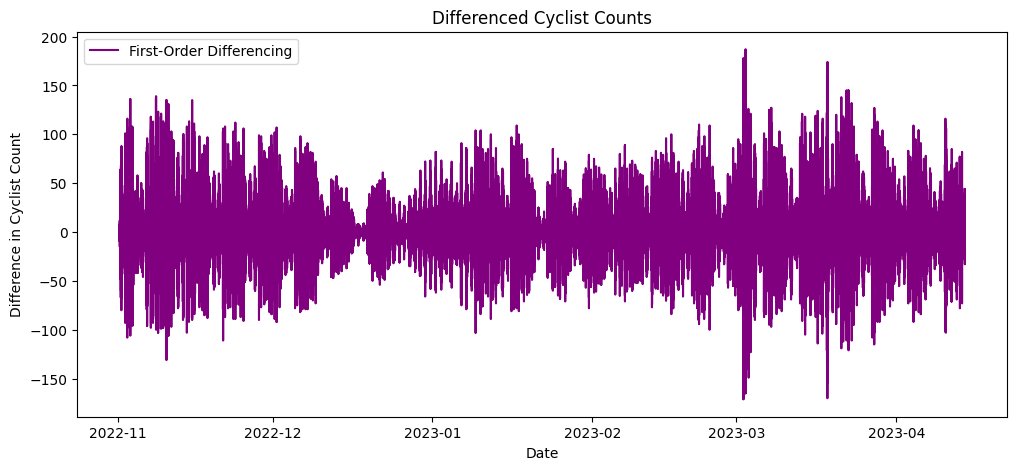

In [7]:

plt.figure(figsize=(12, 5))
plt.plot(df["datetime_start"], df["difference"], label="First-Order Differencing", color="purple")
plt.legend()
plt.title("Differenced Cyclist Counts")
plt.xlabel("Date")
plt.ylabel("Difference in Cyclist Count")
plt.show()


count    94516.000000
mean         0.000053
std         23.765325
min       -171.000000
25%        -10.000000
50%         -1.000000
75%          5.000000
max        187.000000
Name: difference, dtype: float64


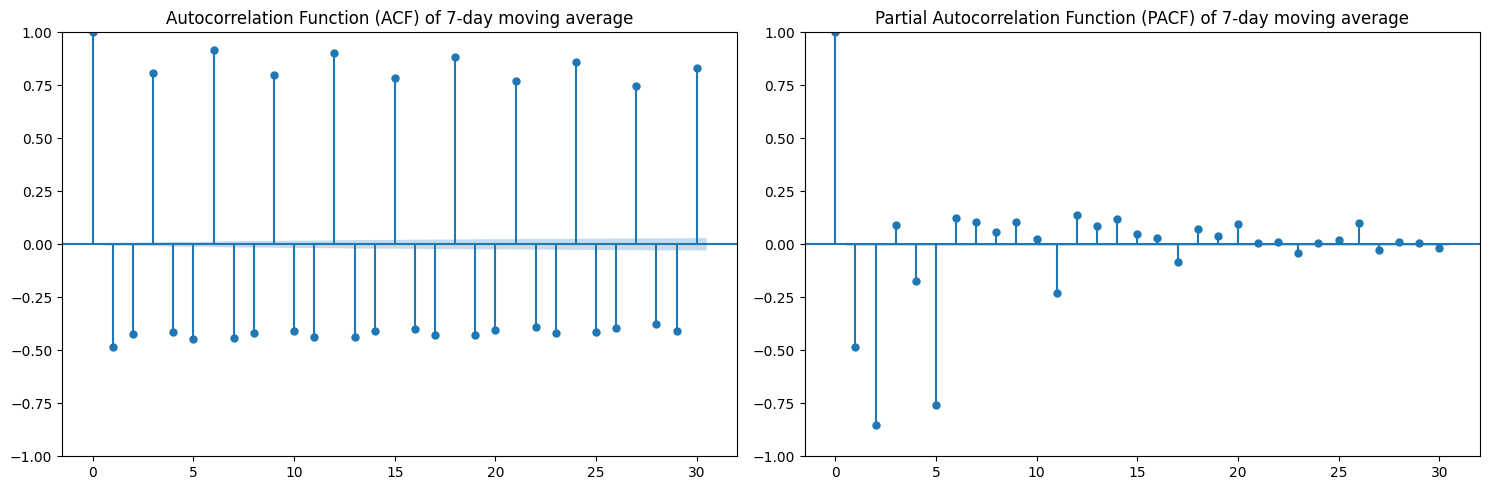

In [14]:
#3-3.Compute ACF & PACF
#Autocorrelation Function (ACF): Detect repeating cycles (e.g., daily or weekly patterns).
#Partial Autocorrelation Function (PACF): Identify significant lags that influence future values.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot ACF and PACF

difference_series = df["difference"].dropna()
print(difference_series.describe())

#Plot ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Autocorrelation Function (ACF)
plot_acf(difference_series, lags=30, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF) of 7-day moving average")

#Partial Autocorrelation Function (PACF)
plot_pacf(difference_series, lags=30, ax=axes[1], method='ywm')
axes[1].set_title("Partial Autocorrelation Function (PACF) of 7-day moving average")

plt.tight_layout()
plt.show()

1. Do you observe a clear trend in the cyclist count over time?
**A:There is no clear increasing or decreasing long-term trend, but a distinct repeating weekly cycle can be clearly observed.**
2. Is there a repeating pattern in the data?
**A: In the ACF plot, peaks at lag = 7, 14, 21, etc., in the ACF plot suggest a weekly repeating pattern. The cyclist data clearly exhibits a weekly repeating pattern. This is seen in both the shape of the time series and autocorrelation structure of the differenced data.**
3. What do the ACF/PACF plots suggest about seasonal effects?
**A: Seasonal effects are strongly evident through weekly repetition identified in the ACF and PACF plots.**